In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed

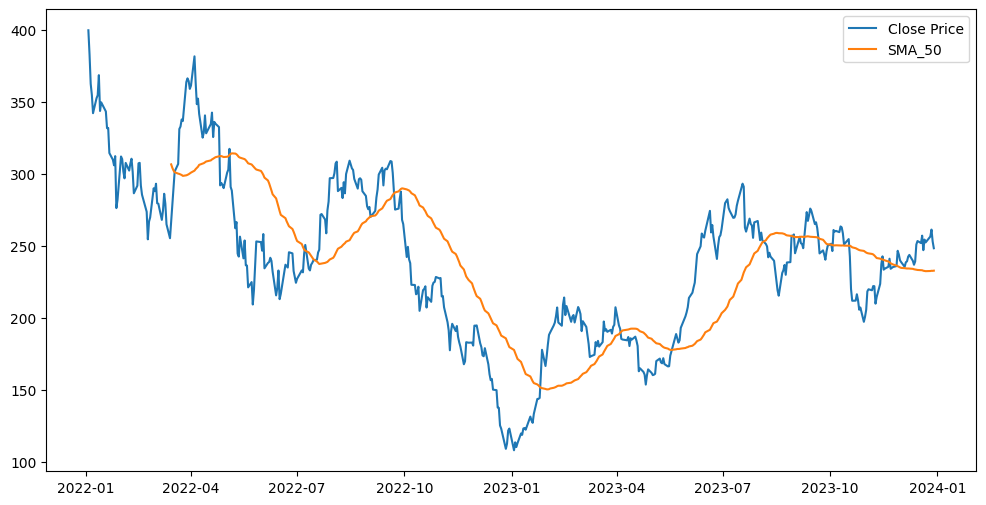

In [6]:
# Fetch historical data (fetching more data for a robust calculation)
data = yf.download('TSLA', start='2022-01-01', end='2023-12-31')
data['Returns'] = data['Close'].pct_change()
# Calculate the 50-day simple moving average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Plot the closing price and SMA

plt.figure(figsize=(12, 6))  
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='SMA_50')
plt.legend()
plt.show()


None


In [38]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

def get_beta(ticker):
    url = f"https://finance.yahoo.com/quote/{ticker}/key-statistics"
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/114.0'}


    response = requests.get(url, headers=headers)
    response.raise_for_status() 
    # print(response, 'ffgd')

    soup = BeautifulSoup(response.content, 'html.parser')
    

    # Strategy 1: Look for a specific table row:
    current = soup.select_one(f'fin-streamer[data-field="regularMarketPrice"][data-symbol="{ticker}"]')
    print(current['value'], 'ddd')
    # print(beta_row, 'ffgd')
    # if beta_row:
    #     beta_value = beta_row.find_next_sibling('td').get_text()
    #     return beta_value
    # else:
    #     return None 
get_beta('APPL')


0 ddd


In [46]:
symbol = 'AAPL'
stock_info = yf.Ticker(symbol)
beta = stock_info.info['beta']
current_price = stock_info.info['currentPrice']
debt_to_equity = stock_info.info['debtToEquity']
cashflow = stock_info.cashflow
freecashflow = stock_info.info['freeCashflow']
value_of_equity = stock_info.info['enterpriseValue'] - stock_info.info['totalDebt']
market_value_of_equity_and_debt = stock_info.info['marketCap'] + stock_info.info['totalDebt']
cost_of_equity = 0.07
# print(f'Beta: {beta}, Current Price: {current_price}, Debt to Equity: {debt_to_equity}, Free Cash Flow: {freecashflow}, Value of Equity: {value_of_equity}')
# print(f'Beta: {beta}, Current Price: {current_price}, Debt to Equity: {debt_to_equity}')




In [33]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/114.0'}

ticker = "AAPL"
url = f"https://finance.yahoo.com/quote/{ticker}"

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

current = soup.select_one(f'fin-streamer[data-field="regularMarketPrice"][data-symbol="{ticker}"]')
print(current['value'])
get

182.79


# YTM

In [48]:
import datetime

def approximate_ytm(face_value, current_price, coupon_rate, years_to_maturity, payments_per_year=2):
    coupon_payment = face_value * coupon_rate / payments_per_year
    periods = years_to_maturity * payments_per_year
    approx_ytm = ((coupon_payment * periods + face_value) / (current_price + face_value)) - 1
    return approx_ytm * payments_per_year

# Example usage (assuming your previously provided data)
face_value = 1000
current_price = 1050 
coupon_rate = 0.0445  
maturity_date = datetime.date(2044, 5, 6)
today = datetime.date.today()
years_to_maturity = (maturity_date - today).days / 365 

result = approximate_ytm(face_value, current_price, coupon_rate, years_to_maturity)
print(f"Approximate YTM: {result:.2%}") 


Approximate YTM: -14.60%
